### Distances in Cosmology

- #### FLRW Metric
    $$ds^2 = c^2dt^2 - a(t)^2\left[ \frac{dr^2}{1-Kr^2} + r^2d\Omega^2 \right]$$ 
    where $d\Omega^2 = d\theta^2 + sin^2\phi d\phi^2$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from Planck18 import *
from constants import *

%matplotlib inline

In [2]:
H = lambda a: H0 * (Omega_rad / a**4 + (Omega_c+Omega_b)/a**3 + Omega_k/a**2 + Omega_Lambda/a**(3*(1+w)))**(0.5)
dt_da = lambda a: a / (H0 * (Omega_rad + a*(Omega_c+Omega_b) + a**2 * Omega_k + a**4 * Omega_Lambda) ** 0.5)
age = lambda a: integrate.quad(dt_da, 0, a)[0] * Mpc/Km/Gyr                 #? Age in Gyrs
age(1), age(0.5)

(13.797557652308598, 5.84382069386923)

- #### Redshift ($z$)
    $a = \dfrac{1}{1+z}$

In [3]:
a_z = lambda z: 1 / (1+z)                                    #? Scale factor as a function of redshift
z_cmb = 1100
a_cmb = a_z(z_cmb)
age_cmb = age(a_cmb)
age_cmb

0.0003971856503987208

### Horizons
   - We calculate the proper distance between two events(occuring at the same time) by setting $dt=0$ 
   - To calculate the horizon we set $d\Omega = 0$ and $ds=0$ (null geodesic) to get $\frac{cdt}{a(t)} = \frac{dr}{\sqrt{1-Kr^2}}$
   - Now, H = $\frac{da/dt}{a}$ which gives us $\frac{cdt}{a(t)} = \frac{cda}{a^2H}$
   - $\Rightarrow \int_0^1 \frac{cda'}{a'^2H} \,\mathrm{d}a'= \int_0^r \frac{dr'}{\sqrt{1-Kr'^2}} \,\mathrm{d}r'$
   - Which gives $r_{Horizon} = f \left( \int_0^1 \frac{cda'}{a'^2H} \,\mathrm{d}a' \right) $ where 
       $$\ f(x) =
  \begin{cases}
    \sin(x)       & \quad K=1\\
    x  & \quad K=0 \\
    \sinh(x)  & \quad K=-1
  \end{cases}
\ $$

In [4]:
def d_eta(a, Omega_m=Omega_m, Omega_rad=Omega_rad, Omega_k=Omega_k, Omega_Lambda=Omega_Lambda):
    return c / 1000 / (H0*np.sqrt((Omega_m*a)+Omega_rad+(Omega_k*a**2)+Omega_Lambda*a**4))

def eta(a, Omega_m=Omega_m, Omega_rad=Omega_rad, Omega_k=Omega_k, Omega_Lambda=Omega_Lambda): 
    return integrate.quad(d_eta, a, 1, args=(Omega_m, Omega_rad, Omega_k, Omega_Lambda))[0]

def comoving_horizon(a, Omega_m=Omega_m, Omega_rad=Omega_rad, Omega_k=Omega_k, Omega_Lambda=Omega_Lambda):
    '''In Mpc'''
    return integrate.quad(d_eta, 0, a, args=(Omega_m, Omega_rad, Omega_k, Omega_Lambda))[0]

def proper_horizon(a, Omega_m=Omega_m, Omega_rad=Omega_rad, Omega_k=Omega_k, Omega_Lambda=Omega_Lambda):
    return a * comoving_horizon(a, Omega_m, Omega_rad, Omega_k, Omega_Lambda)

print(f"Comoving Horizon today: {comoving_horizon(1)} Mpc")
print(f"Proper Horizon today: {proper_horizon(1)} Mpc\n")
print(f"Comoving Horizon at redshift {z_cmb}: {comoving_horizon(a_cmb)} Mpc")
print(f"Proper Horizon at redshift {z_cmb}: {proper_horizon(a_cmb)} Mpc")

Comoving Horizon today: 14208.703730455261 Mpc
Proper Horizon today: 14208.703730455261 Mpc

Comoving Horizon at redshift 1100: 312.88260391343243 Mpc
Proper Horizon at redshift 1100: 0.28418038502582416 Mpc


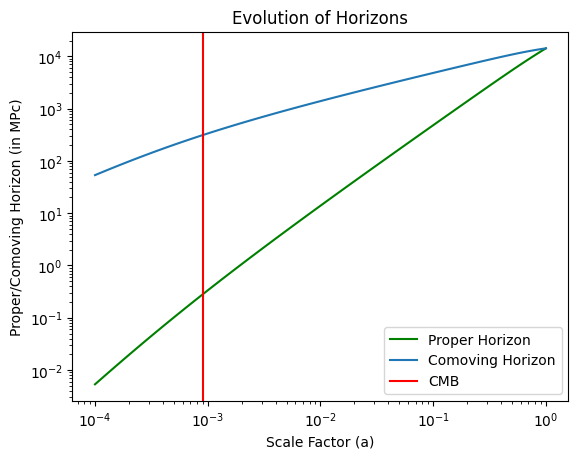

In [5]:
A = np.logspace(-4, 0, 100)
PH = list(map(proper_horizon, A))
CH = list(map(comoving_horizon, A))

plt.loglog(A, PH, label='Proper Horizon', color='green')
plt.loglog(A, CH, label='Comoving Horizon')
plt.xlabel("Scale Factor (a)")
plt.ylabel("Proper/Comoving Horizon (in MPc)")
plt.title('Evolution of Horizons')
plt.axvline(a_cmb, 0, 1, label='CMB',color='red')
plt.legend()
plt.show()

### Distances
   - Comoving Distance : $d_C = f \left( \int_0^a \frac{cda'}{a'^2H} \,\mathrm{d}a' \right)$
   - Angular Distance : $d_A = a d_C$
   - Luminosity Distance : $d_L = \frac{d_C}{a} = \frac{d_A}{a^2}$

In [6]:
#? Distances (curvature taken into account)
def comoving_distance(a, Omega_m=Omega_m, Omega_rad=Omega_rad, Omega_k=Omega_k, Omega_Lambda=Omega_Lambda):
    et = eta(a, Omega_m=Omega_m, Omega_rad=Omega_rad, Omega_k=Omega_k, Omega_Lambda=Omega_Lambda)
    if Omega_k < 0:
        return  c* np.sin(H0 * np.sqrt(-Omega_k) * et / c) / H0 / np.sqrt(-Omega_k)
    elif Omega_k > 0:
        return c * np.sinh(H0 * np.sqrt(Omega_k) * et / c, dtype=np.longdouble) / H0 / np.sqrt(Omega_k)
    else:
        return et

def angular_distance(a, Omega_m=Omega_m, Omega_rad=Omega_rad, Omega_k=Omega_k, Omega_Lambda=Omega_Lambda):
    return a * comoving_distance(a, Omega_m, Omega_rad, Omega_k, Omega_Lambda)

def luminosity_distance(a, Omega_m=Omega_m, Omega_rad=Omega_rad, Omega_k=Omega_k, Omega_Lambda=Omega_Lambda):
    return angular_distance(a, Omega_m, Omega_rad, Omega_k, Omega_Lambda) / a**2

luminosity_distance(0.1)

94005.71324219412

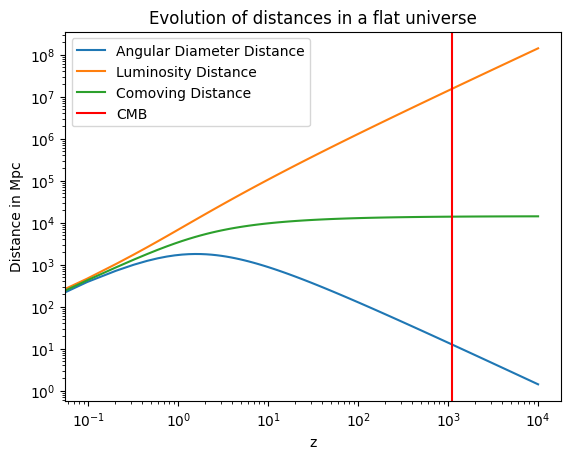

In [7]:
A = np.logspace(-4, 0, 100)

AD = list(map(angular_distance, A))
CD = list(map(comoving_distance, A))
LD = list(map(luminosity_distance, A))

plt.loglog(1/A-1,AD,label='Angular Diameter Distance')
plt.loglog(1/A-1,LD,label='Luminosity Distance')
plt.loglog(1/A-1,CD,label='Comoving Distance')
plt.xlabel("z")
plt.ylabel("Distance in Mpc")
plt.title(f'Evolution of distances in a flat universe')
plt.axvline(1/a_cmb-1, 0, 1,color='red',label='CMB')
plt.legend()
plt.show()

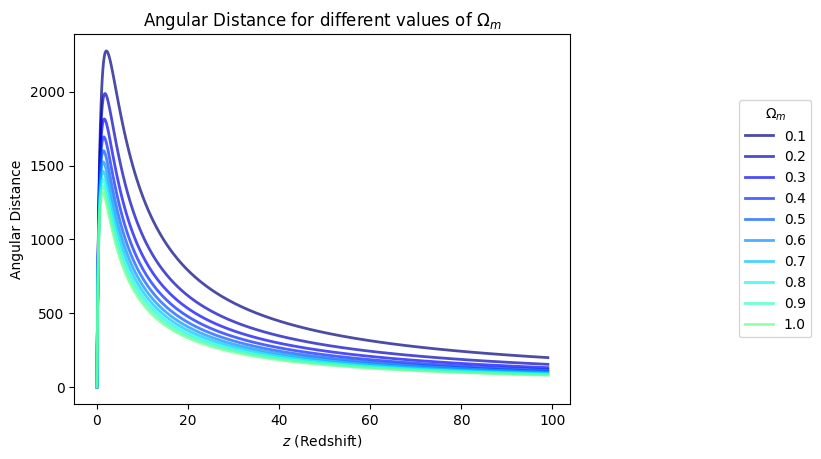

In [8]:
A = np.logspace(-2, 0, 100)
Om_m = np.linspace(0.1, 1, 10)
Om_k = np.zeros(10)
Om_r = np.full(10, Omega_rad)
Om_l = 1 - Om_m - Om_r - Om_k
colors = plt.cm.jet(np.linspace(0,1,20))

AD_Om = [[], [], [], [], [], [], [], [], [], []]
for i in range(10):
    for j in A:
        AD_Om[i].append(angular_distance(j, Om_m[i], Om_r[i], Om_k[i], Om_l[i]))

for i in range(10):
    plt.plot(1/A-1, AD_Om[i], alpha=0.7, linewidth=2, color=colors[i], label=f'{Om_m[i]:.1f}')   
plt.xlabel("$z$ (Redshift)")
plt.ylabel("Angular Distance")
plt.legend(bbox_to_anchor=(1.5, 0.5),loc='center right', title=r'$\Omega_m$')
plt.title(r'Angular Distance for different values of $\Omega_m$')
plt.show()  

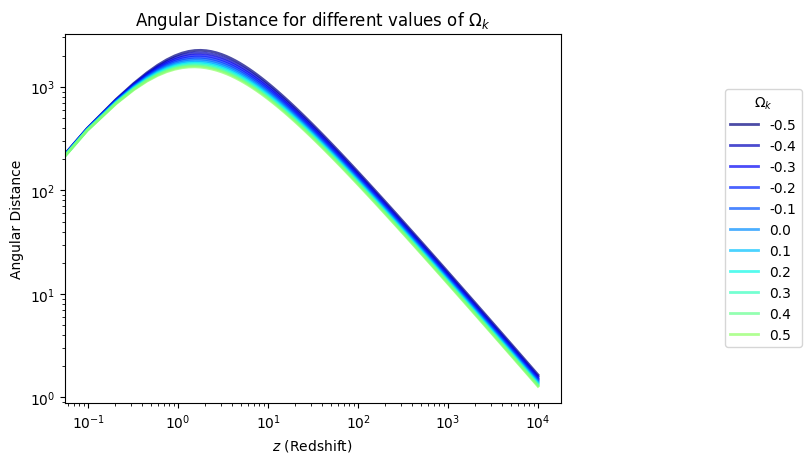

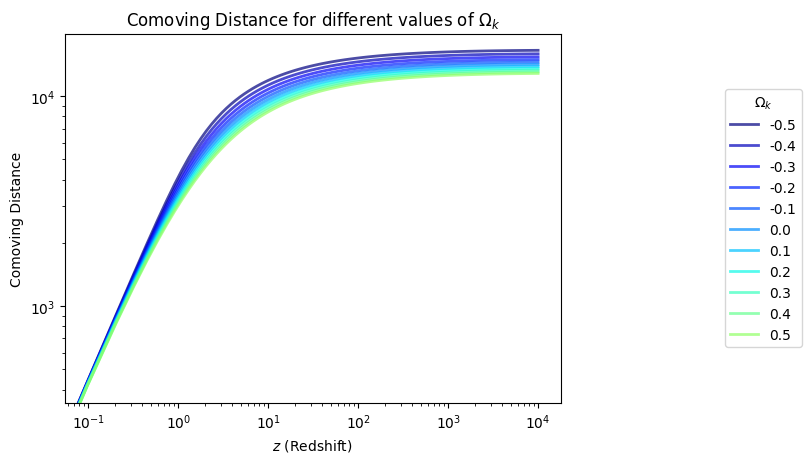

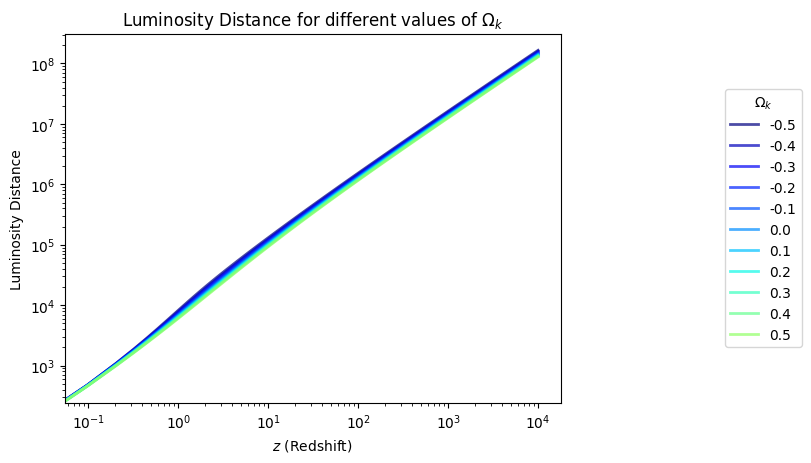

In [9]:
A = np.logspace(-4, 0, 100)
Om_k = np.linspace(-0.5, 0.5, 11)
Om_m = np.full(11, Omega_m)
Om_r = np.full(11, Omega_rad)
Om_l = 1 - Om_m - Om_r - Om_k
colors = plt.cm.jet(np.linspace(0,1,20))

AD = [[], [], [], [], [], [], [], [], [], [], []]
CD = [[], [], [], [], [], [], [], [], [], [], []]
LD = [[], [], [], [], [], [], [], [], [], [], []]
for i in range(11):
    for j in A:
        AD[i].append(angular_distance(j, Om_m[i], Om_r[i], Om_k[i], Om_l[i]))
        CD[i].append(comoving_distance(j, Om_m[i], Om_r[i], Om_k[i], Om_l[i]))
        LD[i].append(luminosity_distance(j, Om_m[i], Om_r[i], Om_k[i], Om_l[i]))

#? Angular Distance
for i in range(11):
    plt.loglog(1/A-1, AD[i], label=f'{Om_k[i]:.1f}', alpha=0.7, linewidth=2, color=colors[i])
    
plt.xlabel("$z$ (Redshift)")
plt.ylabel("Angular Distance")
plt.legend(bbox_to_anchor=(1.5, 0.5),loc='center right', title=r'$\Omega_k$')
plt.title(r'Angular Distance for different values of $\Omega_k$')
plt.show()  

#? Comoving Distance
for i in range(11):
    plt.loglog(1/A-1, CD[i], label=f'{Om_k[i]:.1f}', alpha=0.7, linewidth=2, color=colors[i])
    
plt.xlabel("$z$ (Redshift)")
plt.ylabel("Comoving Distance")
plt.legend(bbox_to_anchor=(1.5, 0.5),loc='center right', title=r'$\Omega_k$')
plt.title(r'Comoving Distance for different values of $\Omega_k$')
plt.show()  

#? Luminosity Distance
for i in range(11):
    plt.loglog(1/A-1, LD[i], label=f'{Om_k[i]:.1f}', alpha=0.7, linewidth=2, color=colors[i])
    
plt.xlabel("$z$ (Redshift)")
plt.ylabel("Luminosity Distance")
plt.legend(bbox_to_anchor=(1.5, 0.5),loc='center right', title=r'$\Omega_k$')
plt.title(r'Luminosity Distance for different values of $\Omega_k$')
plt.show()  

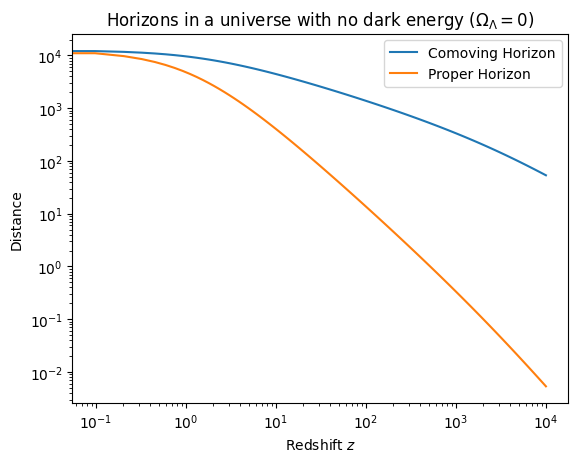

In [10]:
#? Universe without dark energy
A = np.logspace(-4, 0, 100)
Om_l = np.full(len(A), 0)
Om_m = np.full(len(A), Omega_m)
Om_r = np.full(len(A), Omega_rad)
Om_k = np.full(len(A), 1 - Om_m - Om_r - Om_l)
CH = list(map(comoving_horizon, A, Om_m, Om_r, Om_k, Om_l))
PH = list(map(proper_horizon, A, Om_m, Om_r, Om_k, Om_l))

plt.loglog(1/A-1, CH, label='Comoving Horizon')
plt.loglog(1/A-1, PH, label='Proper Horizon')
plt.xlabel(r"Redshift $z$")
plt.ylabel("Distance")
plt.title(r"Horizons in a universe with no dark energy ($\Omega_{\Lambda} = 0$)")
plt.legend()

plt.show()

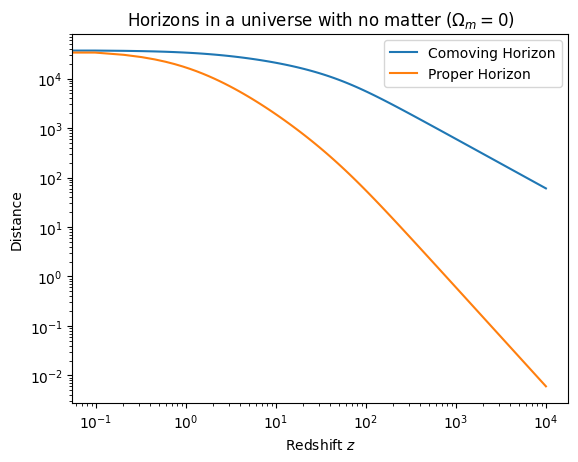

In [11]:
#? Universe without matter
A = np.logspace(-4, 0, 100)
Om_m = np.full(len(A), 0)
Om_l = np.full(len(A), Omega_Lambda)
Om_r = np.full(len(A), Omega_rad)
Om_k = np.full(len(A), 1 - Om_m - Om_r - Om_l)
CH = list(map(comoving_horizon, A, Om_m, Om_r, Om_k, Om_l))
PH = list(map(proper_horizon, A, Om_m, Om_r, Om_k, Om_l))

plt.loglog(1/A-1, CH, label='Comoving Horizon')
plt.loglog(1/A-1, PH, label='Proper Horizon')
plt.xlabel(r"Redshift $z$")
plt.ylabel("Distance")
plt.title(r"Horizons in a universe with no matter ($\Omega_m = 0$)")
plt.legend()
plt.show()

### Deceleration ($q$)
   - $q := -\dfrac{\ddot{a} a}{\dot{a}^2}$
   - $q = - 1 - \dfrac{\dot{H}}{H^2}$, $\dot H$ is the time derivative of Hubbles constant $H$

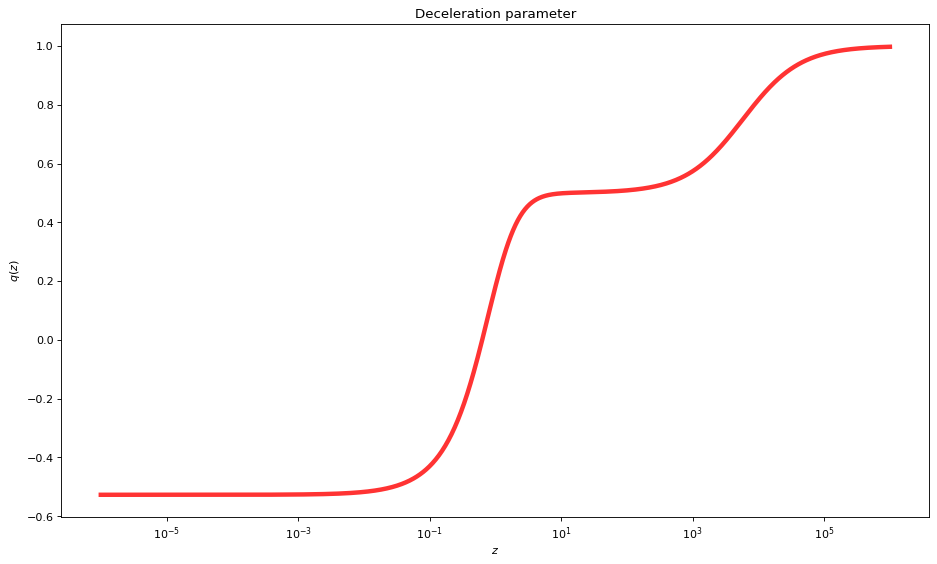

In [12]:
#? Deceleration 
def H(a, Omega_m=Omega_m, Omega_rad=Omega_rad, Omega_k=Omega_k, Omega_Lambda=Omega_Lambda):
    return np.sqrt((Omega_m/a**3.0) + Omega_Lambda+ (Omega_rad/a**4.0) + (Omega_k/a**2.0))

def dH_da(a, Omega_m=Omega_m, Omega_rad=Omega_rad, Omega_k=Omega_k, Omega_Lambda=Omega_Lambda):
    dh_da = 0.5 / H(a, Omega_m, Omega_rad, Omega_k, Omega_Lambda)
    dh_da *= (-(3.0*Omega_m/a**4.0) - (4.0*Omega_rad/a**5.0) - (2.0*Omega_k/a**3.0))    
    return dh_da

def q(a, Omega_m=Omega_m, Omega_rad=Omega_rad, Omega_k=Omega_k, Omega_Lambda=Omega_Lambda):
    return -1 - a * dH_da(a, Omega_m, Omega_rad, Omega_k, Omega_Lambda) / (H(a, Omega_m, Omega_rad, Omega_k, Omega_Lambda))

Z = np.logspace(-6, 6, 1000)
A = 1 / (1+Z)
Q = list(map(q, A))
plt.figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
plt.xscale('log')
plt.xlabel('$z$')
plt.ylabel('$q(z)$')
plt.xlabel('$z$')
plt.ylabel('$q(z)$')
plt.title('Deceleration parameter')
plt.plot(Z, Q, color="r", lw=4, alpha=0.8)
plt.show()

### Value of the deceleration parameter
- $H(a) = H_0\left[ \frac{\Omega_{rad}}{a^4} + \frac{\Omega_m}{a^3} + \frac{\Omega_k}{a^2} + \Omega_{\Lambda} \right]^{1/2}$
- $\dfrac{dH}{dt} = \dfrac{dH}{da}\dfrac{da}{dt} = \dot a\dfrac{dH}{da}$
- $\dfrac{dH}{da} = \dfrac{1}{2} H_0\left[ \frac{\Omega_{rad}}{a^4} + \frac{\Omega_m}{a^3} + \frac{\Omega_k}{a^2} + \Omega_{\Lambda} \right]^{-1/2} \left[ \frac{-4\Omega_{rad}}{a^5} + \frac{-3\Omega_m}{a^4} + \frac{-2\Omega_k}{a^3}\right]$
- Hence $\dfrac{dH}{dt} = \dfrac{1}{2}aHH_0\left[ \frac{\Omega_{rad}}{a^4} + \frac{\Omega_m}{a^3} + \frac{\Omega_k}{a^2} + \Omega_{\Lambda} \right]^{-1/2} \left[ \frac{-4\Omega_{rad}}{a^5} + \frac{-3\Omega_m}{a^4} + \frac{-2\Omega_k}{a^3}\right]$
- Plugging in values we get the require value for $q$

In [13]:
print(r"Current deceleration of the universe is ", q(1))

Current deceleration of the universe is  -0.5269668767696241
